## Online Food Delivery Data Analysis

This dataset was collected from the residents of Bangalore. I analysed the data with use of following topic in this notebook.

#####  1. Pivot table analysis-Pandas
#####  2. Exploratory data analysis - Univariate and Bivariate
#####  3. Geospatial Analysis
#####  4. Text Analysis


In [3]:
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warn = warnings.simplefilter('ignore')

In [4]:
#basic plot structure
sns.set_style('white')        # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [5]:
#read dataset
fd = pd.read_csv("onlinedeliverydata.csv")
print(fd.shape)
fd.head()

(388, 55)


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [6]:
#Get columns name
fd.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [7]:
#Get unique value with count
fd['Gender'].value_counts()

Male      222
Female    166
Name: Gender, dtype: int64

In [8]:
#Get NA values counts with column name
fd.isna().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

In [9]:
#Insights on continuous variable
fd.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [10]:
#distribution plot
def dist_plot(i,column_name):
    plt.subplot(1,2,i)
    ax = sns.distplot(fd[column_name],color = 'Blue')
    ax.set_xlabel(column_name,fontsize = 18)

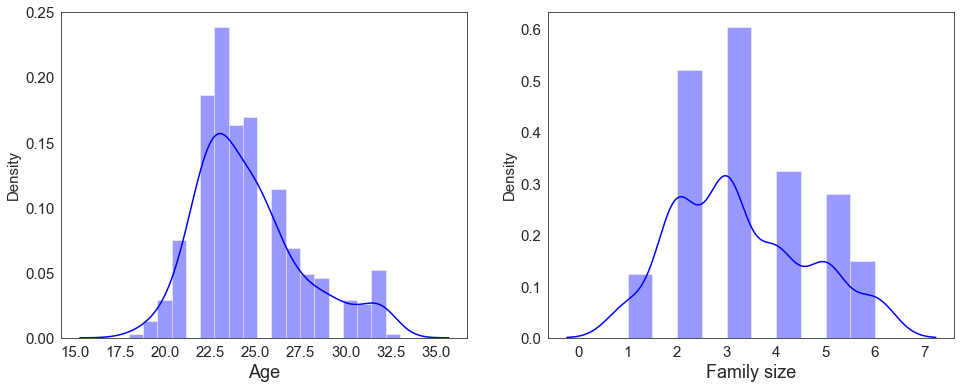

In [11]:
plt.figure(figsize = (16,6))
dist_plot(1,'Age')
dist_plot(2,'Family size')

In [12]:
#box plot
def box_plot(i,column_name):
    plt.subplot(1,2,i)
    ax = sns.boxplot(x = column_name,data=fd)
    ax.set_xlabel(column_name,fontsize = 18)

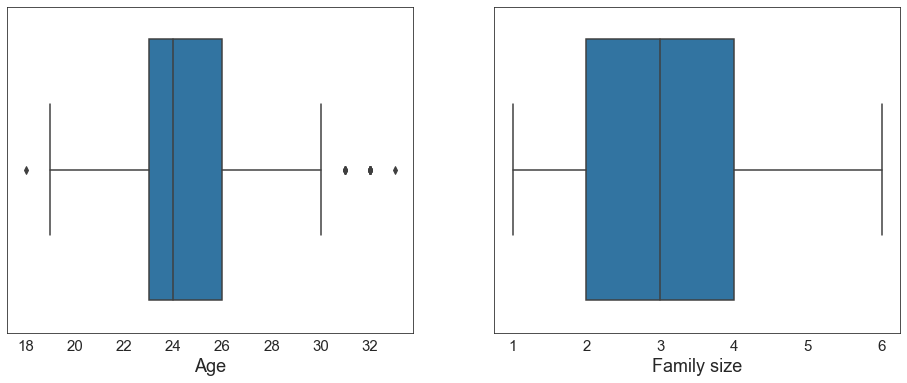

In [13]:
plt.figure(figsize = (16,6))
box_plot(1,'Age')
box_plot(2,'Family size')

In [14]:
#demographical variable analysis using pivot table
def pivot_table(var_1,var_2):
    return  pd.pivot_table(fd,index = [var_1,var_2],values = ['Age','Family size'],aggfunc = [np.mean,len]) 

In [15]:
pivot1 = pivot_table('Gender','Marital Status')
cm = sns.light_palette("pink", as_cmap=True)
pivot1.style.background_gradient(cmap=cm)\
               .set_properties(border='3px solid white')

In [16]:
pivot2 = pivot_table("Educational Qualifications","Occupation")
pivot2.style\
    .format('{:.2f}')\
    .bar(align='mid',color=['#d68f3f'])\
    .set_properties(padding='5px',border='3px solid white')

In [17]:
pivot3 = pivot_table("Occupation","Monthly Income")
pivot3.style\
    .format('{:.2f}')\
    .bar(align='mid',color='lightgreen')\
    .set_properties(padding='5px',border='3px solid white')

In [18]:
#countplot function
def countplot(x,y,i,column_name):
    plt.subplot(x,y,i)
    ax = sns.countplot(x = column_name,data = fd,edgecolor=sns.color_palette("deep", 5))
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=20)
    ax.set_title(column_name,fontsize = 18)
    ax.set_xlabel('Types',fontsize = 15)
    plt.tight_layout()

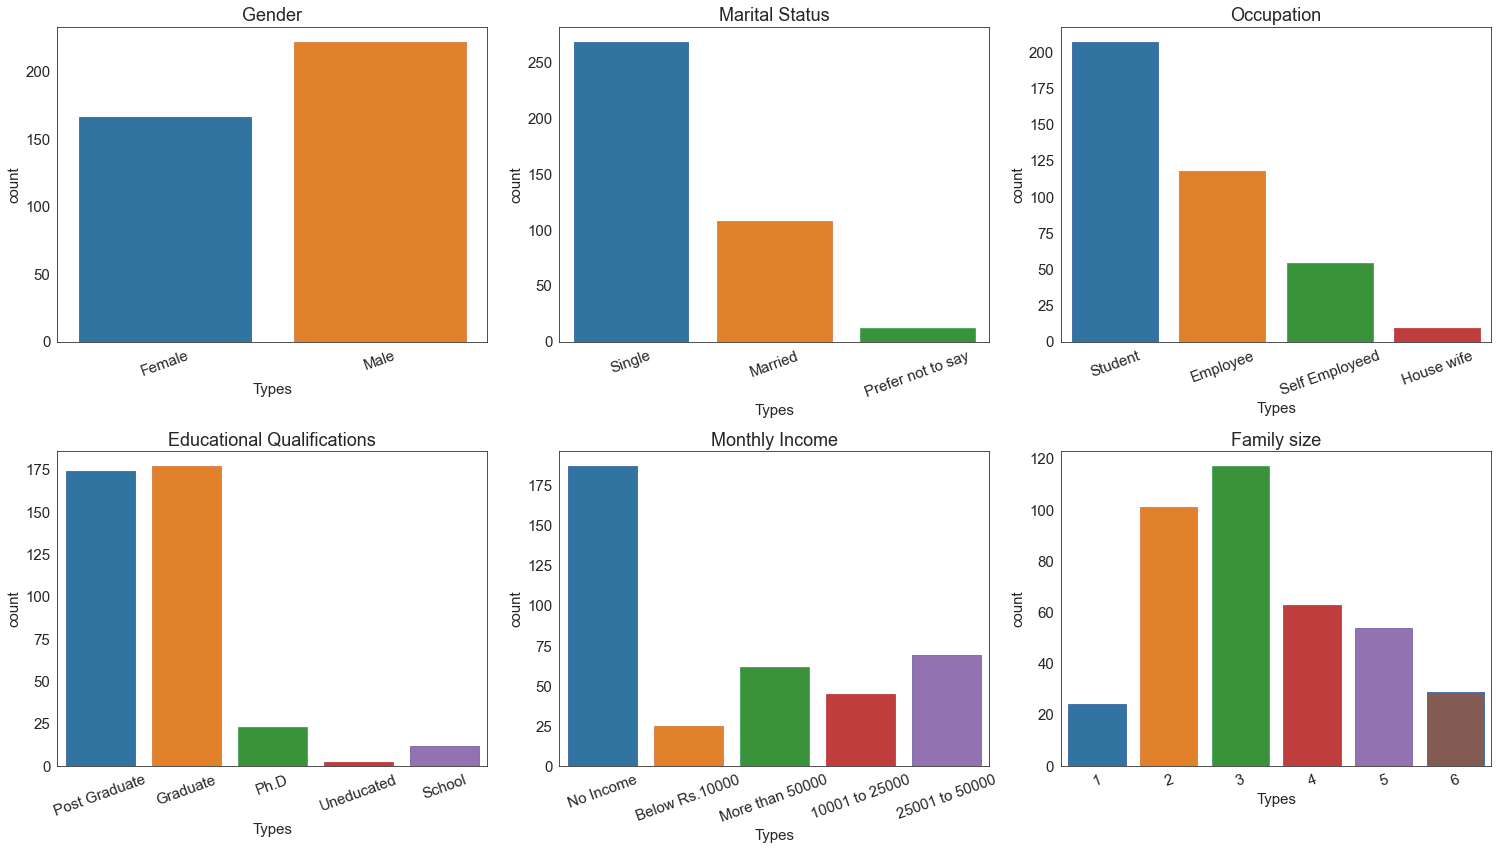

In [19]:
#countplot for demographical variable
plt.figure(figsize = (21,12))
countplot(2,3,1,'Gender')
countplot(2,3,2,'Marital Status')
countplot(2,3,3,'Occupation')
countplot(2,3,4,'Educational Qualifications')
countplot(2,3,5,'Monthly Income')
countplot(2,3,6,'Family size')

### Consumer preferences

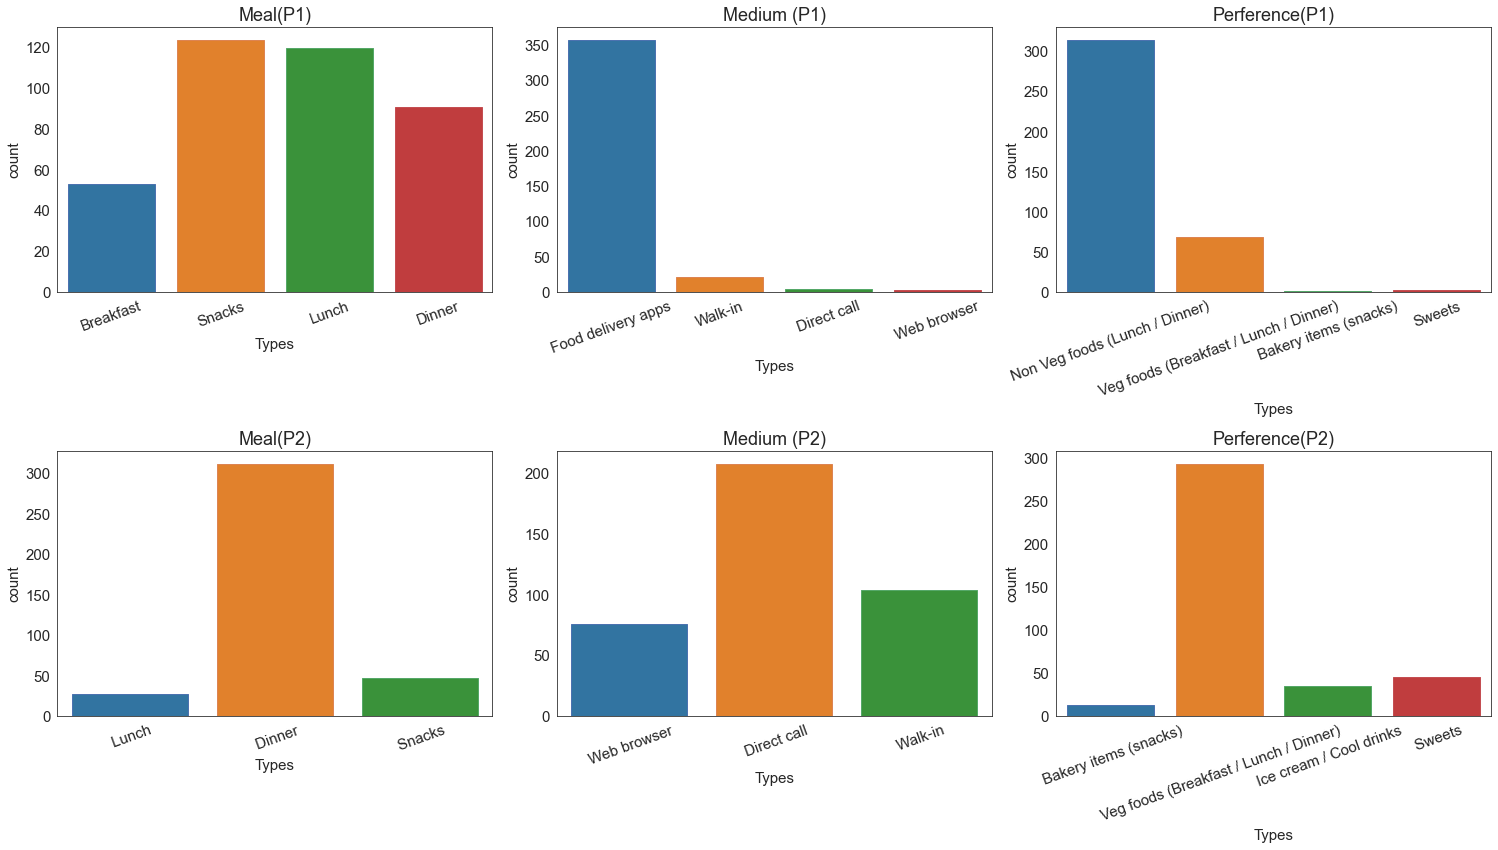

In [20]:
#count plot for Consumer preferences
plt.figure(figsize = (21,12))
countplot(2,3,1,'Meal(P1)')
countplot(2,3,2,'Medium (P1)')
countplot(2,3,3,'Perference(P1)')
countplot(2,3,4,'Meal(P2)')
countplot(2,3,5,'Medium (P2)')
countplot(2,3,6,'Perference(P2)')

### Purchase Demand

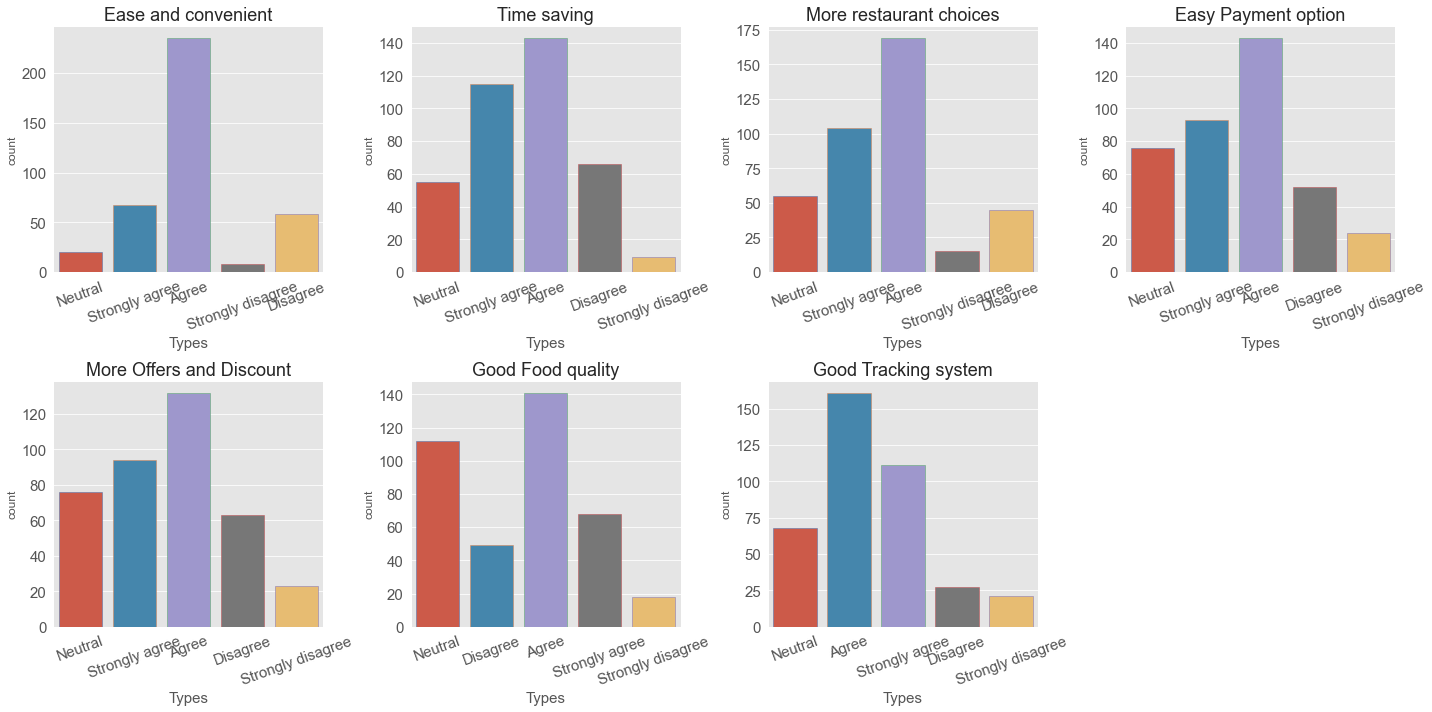

In [21]:
#count plot for Purchase demand
plt.figure(figsize = (20,10))
plt.style.use('ggplot')
countplot(2,4,1,'Ease and convenient')
countplot(2,4,2,'Time saving')
countplot(2,4,3,'More restaurant choices')
countplot(2,4,4,'Easy Payment option')
countplot(2,4,5,'More Offers and Discount')
countplot(2,4,6,'Good Food quality')
countplot(2,4,7,'Good Tracking system')

### Restriction in order demand

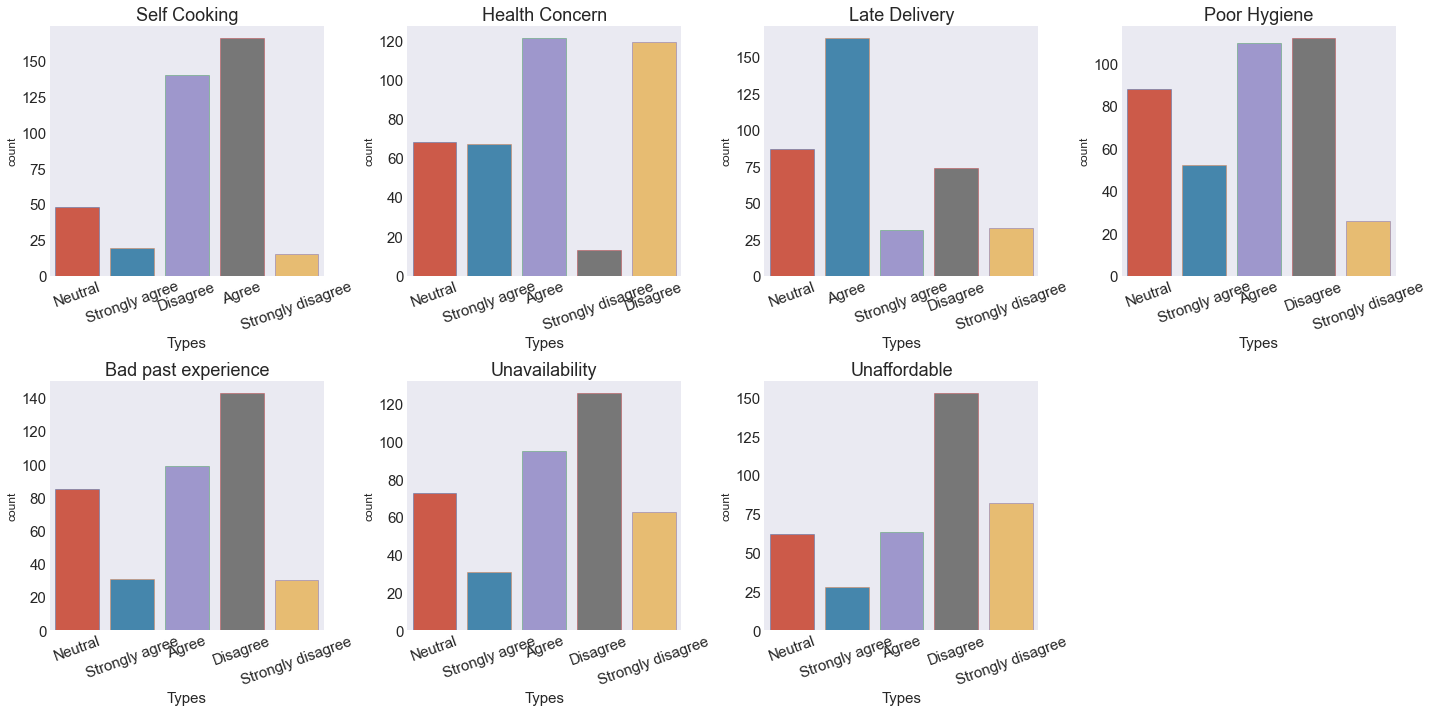

In [22]:
plt.figure(figsize = (20,10))
plt.style.use('seaborn-dark')
countplot(2,4,1,'Self Cooking')
countplot(2,4,2,'Health Concern')
countplot(2,4,3,'Late Delivery')
countplot(2,4,4,'Poor Hygiene')
countplot(2,4,5,'Bad past experience')
countplot(2,4,6,'Unavailability')
countplot(2,4,7,'Unaffordable')

### Influence in Cancellation of order

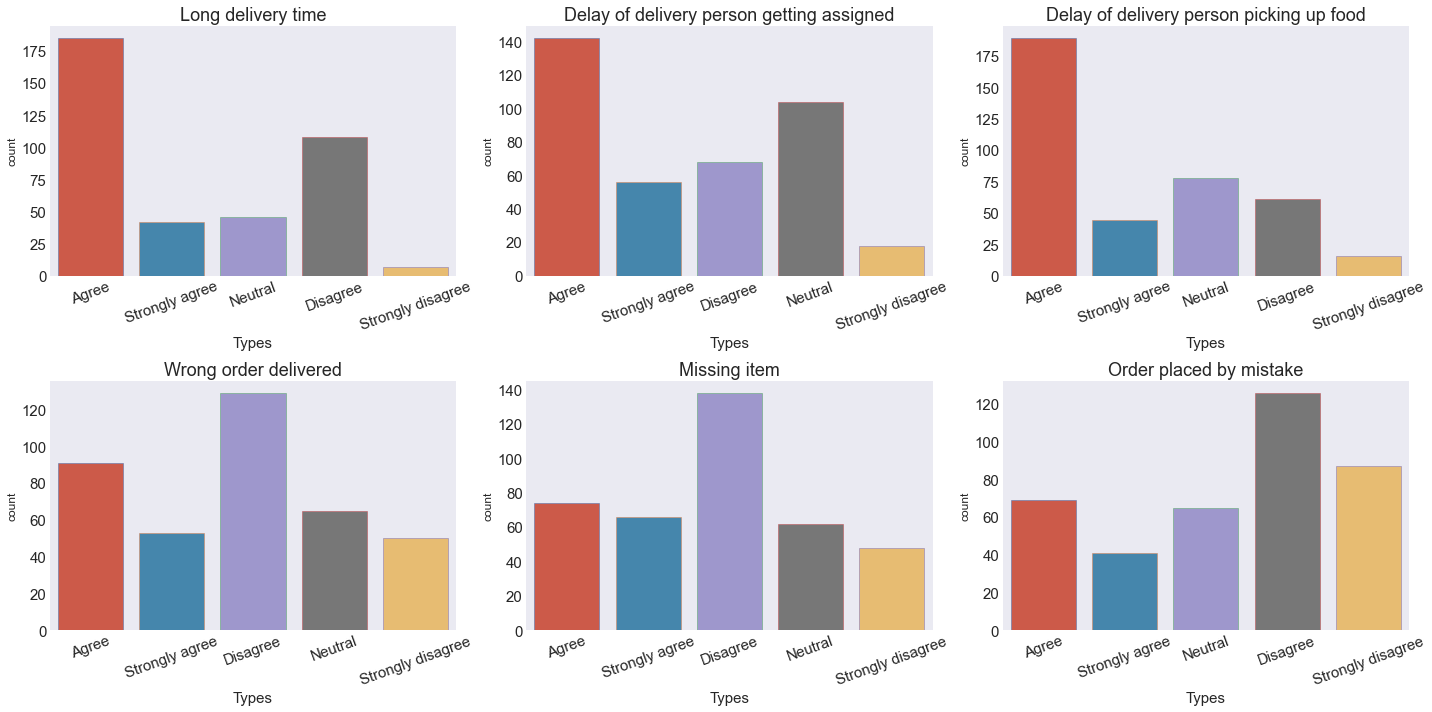

In [23]:
plt.figure(figsize = (20,10))
plt.style.use('seaborn-dark')
countplot(2,3,1,'Long delivery time')
countplot(2,3,2,'Delay of delivery person getting assigned')
countplot(2,3,3,'Delay of delivery person picking up food')
countplot(2,3,4,'Wrong order delivered')
countplot(2,3,5,'Missing item')
countplot(2,3,6,'Order placed by mistake')

### Time factors in order demand

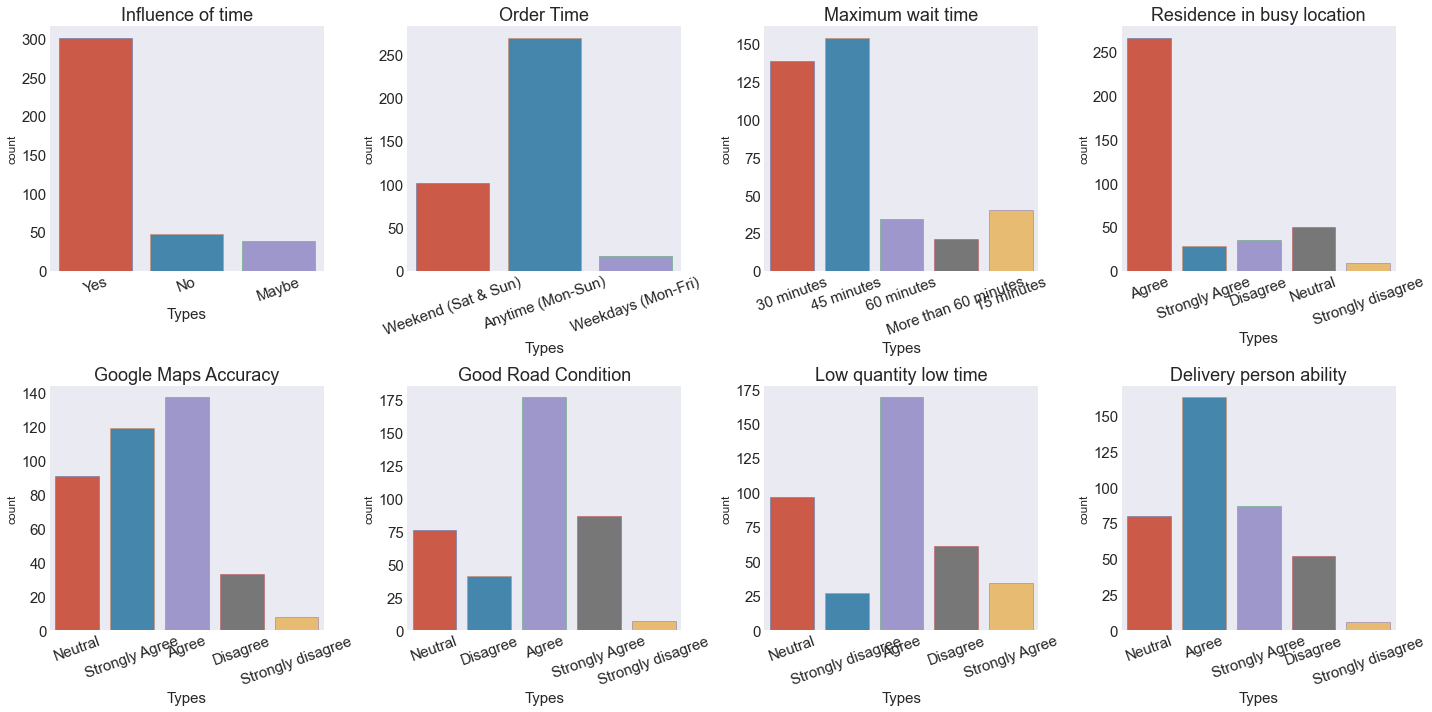

In [24]:
plt.figure(figsize = (20,10))
plt.style.use('seaborn-dark')
countplot(2,4,1,'Influence of time')
countplot(2,4,2,'Order Time')
countplot(2,4,3,'Maximum wait time')
countplot(2,4,4,'Residence in busy location')
countplot(2,4,5,'Google Maps Accuracy')
countplot(2,4,6,'Good Road Condition')
countplot(2,4,7,'Low quantity low time')
countplot(2,4,8,'Delivery person ability')

### Importance of rating post delivery

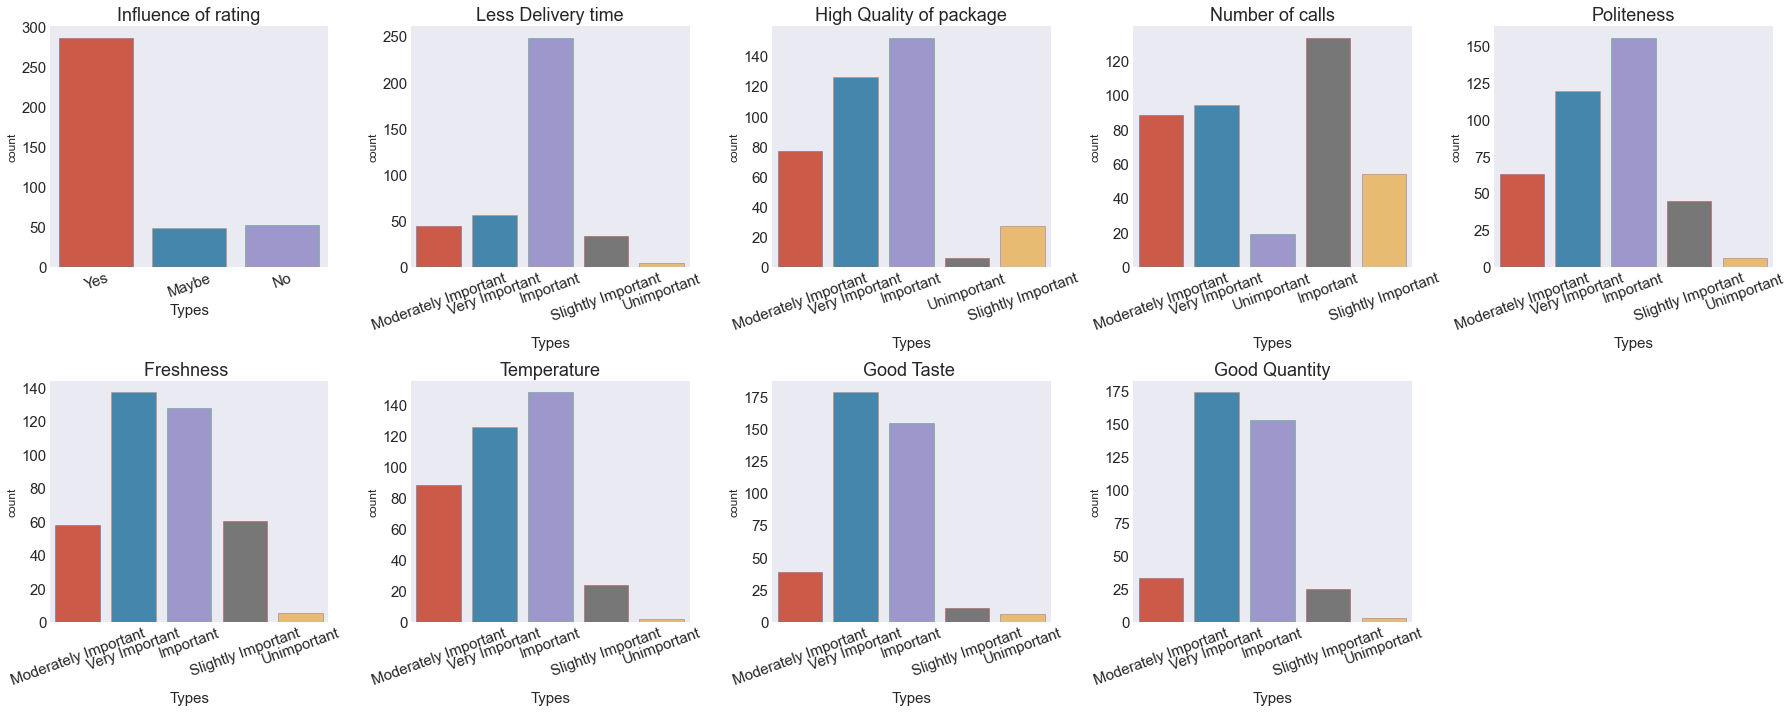

In [25]:
plt.figure(figsize = (25,10))
plt.style.use('seaborn-dark')
countplot(2,5,1,'Influence of rating')
countplot(2,5,2,'Less Delivery time')
countplot(2,5,3,'High Quality of package')
countplot(2,5,4,'Number of calls')
countplot(2,5,5,'Politeness')
countplot(2,5,6,'Freshness ')
countplot(2,5,7,'Temperature')
countplot(2,5,8,'Good Taste ')
countplot(2,5,9,'Good Quantity')

### Bivariate Analysis

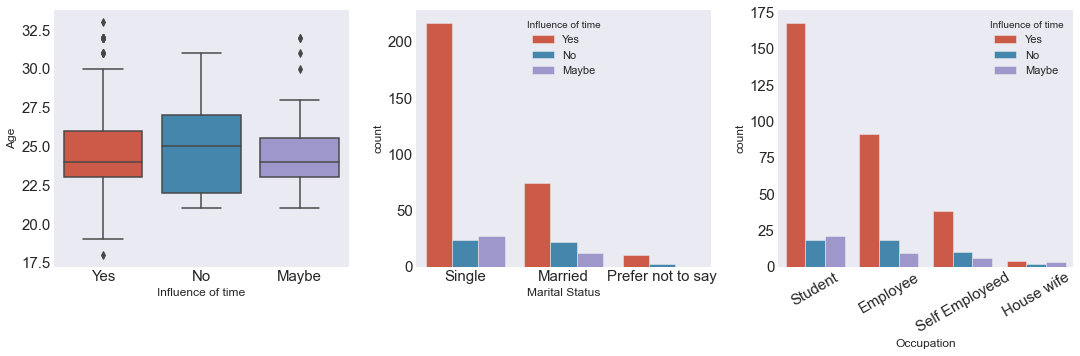

In [26]:
#how Influence of time depends on demographical feature 
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.boxplot(x= 'Influence of time',y='Age',data = fd)
plt.subplot(1,3,2)
sns.countplot(hue = 'Influence of time',x = 'Marital Status',data = fd)
plt.subplot(1,3,3)
ax = sns.countplot(x='Occupation',data = fd,hue = 'Influence of time')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.tight_layout()

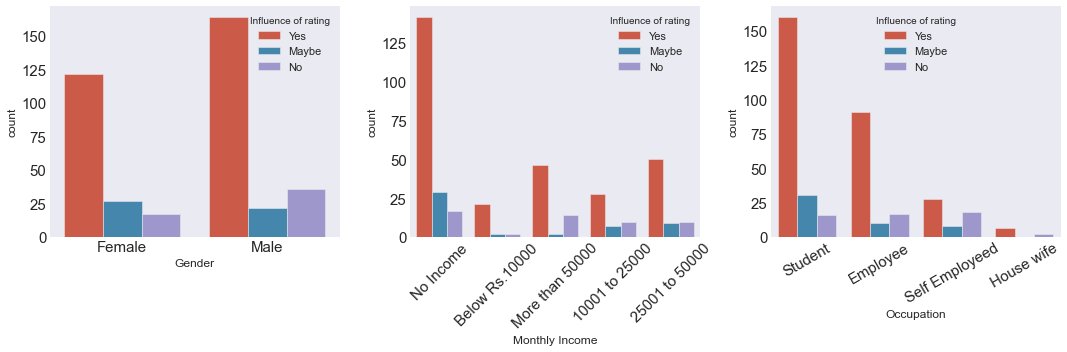

In [27]:
#how Influence of rating depends on demographical feature 
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
ax = sns.countplot(x = 'Gender',data = fd,hue = 'Influence of rating')
plt.subplot(1,3,2)
ax = sns.countplot(x='Monthly Income',data = fd,hue = 'Influence of rating')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.subplot(1,3,3)
ax = sns.countplot(x='Occupation',data = fd,hue = 'Influence of rating')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.tight_layout()

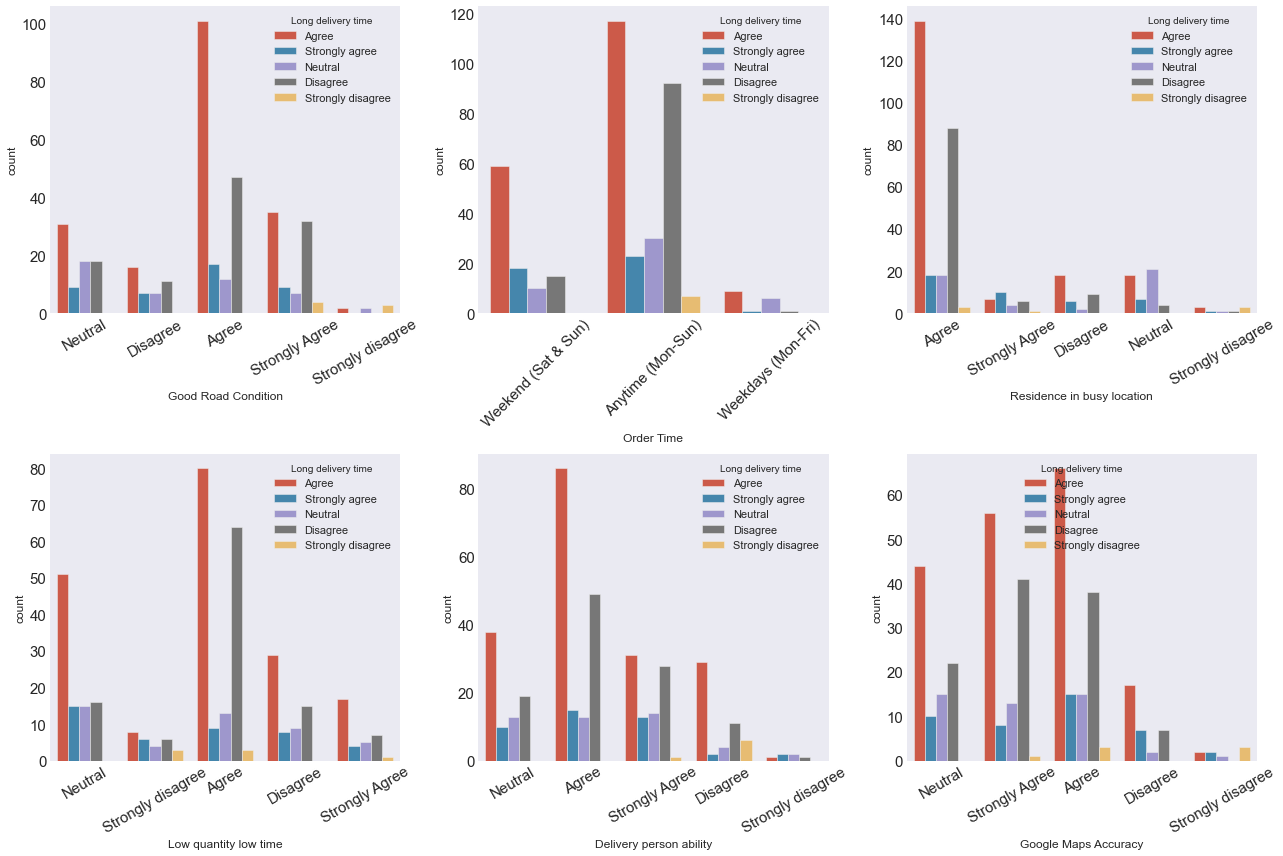

In [28]:
#how delivery time depends on differnet variable
plt.figure(figsize = (18,12))
plt.subplot(2,3,1)
ax = sns.countplot(x = 'Good Road Condition',data = fd,hue = 'Long delivery time')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.subplot(2,3,2)
ax = sns.countplot(x='Order Time',data = fd,hue = 'Long delivery time')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.subplot(2,3,3)
ax = sns.countplot(x='Residence in busy location',data = fd,hue = 'Long delivery time')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.subplot(2,3,4)
ax = sns.countplot(x = 'Low quantity low time',data = fd,hue = 'Long delivery time')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.subplot(2,3,5)
ax = sns.countplot(x = 'Delivery person ability',data = fd,hue = 'Long delivery time')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.subplot(2,3,6)
ax = sns.countplot(x = 'Google Maps Accuracy',data = fd,hue = 'Long delivery time')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.tight_layout()

### Geospatial Analysis

In [29]:
#Geospatial Analysis Libraries
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [30]:
#mark each location on map
m = folium.Map(location=[12.9716,77.5946],tiles='CartoDBpositron',zoom_start = 13)
for idx, row in fd.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m)
m

In [31]:
#create cluster
m = folium.Map(location=[12.9716,77.5946],tiles='CartoDBpositron',zoom_start = 13)
mc = MarkerCluster()
for idx, row in fd.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m.add_child(mc)

### Text Analysis

In [51]:
#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from textblob import TextBlob
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
#removing nil reviews
fd_review = fd.copy()
fd_reviews = fd[~(fd.Reviews.isin(['NIL','nil','Nil','No','Nil\n']))]
fd_reviews = fd_reviews[['Reviews','Output']]
fd_reviews

,Reviews,Output
2,"Many a times payment gateways are an issue, so...",Yes
11,Language barrier is also one major issue. Mosl...,Yes
17,"Spillage, bad packaging and missing items",Yes
18,Once my order from kfc got exchanged with some...,Yes
22,I feel Swiggy has a good interface for users a...,Yes
...,...,...
375,I had bad quality order delivered twice,No
376,Bad rating doesn't mean that the food tastes b...,Yes
377,Order delivered to my location are late,No
378,My location is pretty well built for food deli...,Yes


In [49]:
#Function for  text cleaning
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
fd_reviews['Reviews'] = fd_reviews['Reviews'].apply(lambda x:review_cleaning(x))
fd_reviews.head()

,Reviews,Output
2,many a times payment gateways are an issue so ...,Yes
11,language barrier is also one major issue moslt...,Yes
17,spillage bad packaging and missing items,Yes
18,once my order from kfc got exchanged with some...,Yes
22,i feel swiggy has a good interface for users a...,Yes


In [50]:
#removing stop words from reviews
stop_words = stopwords.words('english')
fd_reviews['Reviews'] = fd_reviews['Reviews'].apply(lambda x:' '.join([word for word in x.split() if word not in stop_words]))
fd_reviews.head()

,Reviews,Output
2,many times payment gateways issue getting refu...,Yes
11,language barrier also one major issue moslty d...,Yes
17,spillage bad packaging missing items,Yes
18,order kfc got exchanged someone else fault del...,Yes
22,feel swiggy good interface users delivery time...,Yes


In [56]:
#creating polarity,review length and word count
# -1 for negative and 1 for positive polarity
fd_reviews['polarity'] = fd_reviews['Reviews'].apply(lambda x:TextBlob(x).sentiment.polarity)
fd_reviews['review_length'] = fd_reviews['Reviews'].apply(len)
fd_reviews['word_count'] = fd_reviews['Reviews'].apply(lambda x: len(str(x).split()))
fd_reviews.head()

,Reviews,Output,polarity,review_length,word_count
2,many times payment gateways issue getting refu...,Yes,0.500000,73,9
11,language barrier also one major issue moslty d...,Yes,0.218750,107,15
17,spillage bad packaging missing items,Yes,-0.450000,36,5
18,order kfc got exchanged someone else fault del...,Yes,0.000000,56,9
22,feel swiggy good interface users delivery time...,Yes,0.266667,106,15


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

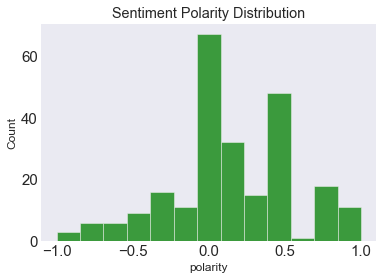

In [64]:
#sentiment analysis
ax = sns.histplot(data = fd_reviews,x = 'polarity',color = 'green')
ax.set_title("Sentiment Polarity Distribution")

Text(0.5, 1.0, 'Review Output analysis')

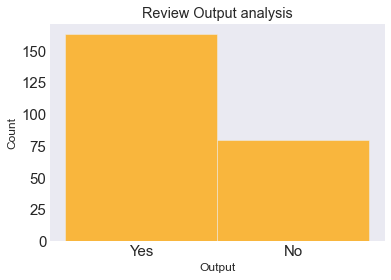

In [71]:
#review output analysis
ax = sns.histplot(data = fd_reviews,x = 'Output',color = 'orange')
ax.set_title("Review Output analysis")

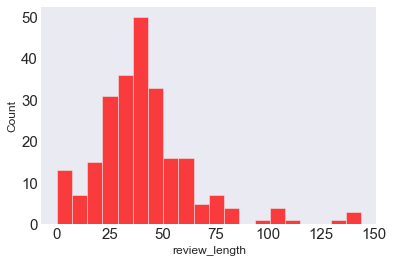

In [68]:
#review text length distribution
sns.histplot(data = fd_reviews,x = 'review_length',color = 'red')

<AxesSubplot:xlabel='word_count', ylabel='Count'>

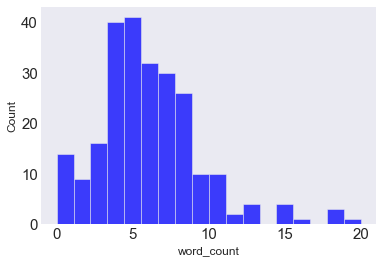

In [73]:
#review word count distribution
sns.histplot(data = fd_reviews,x = 'word_count',color = 'blue')

### Wordcloud

In [76]:
from wordcloud import WordCloud,STOPWORDS

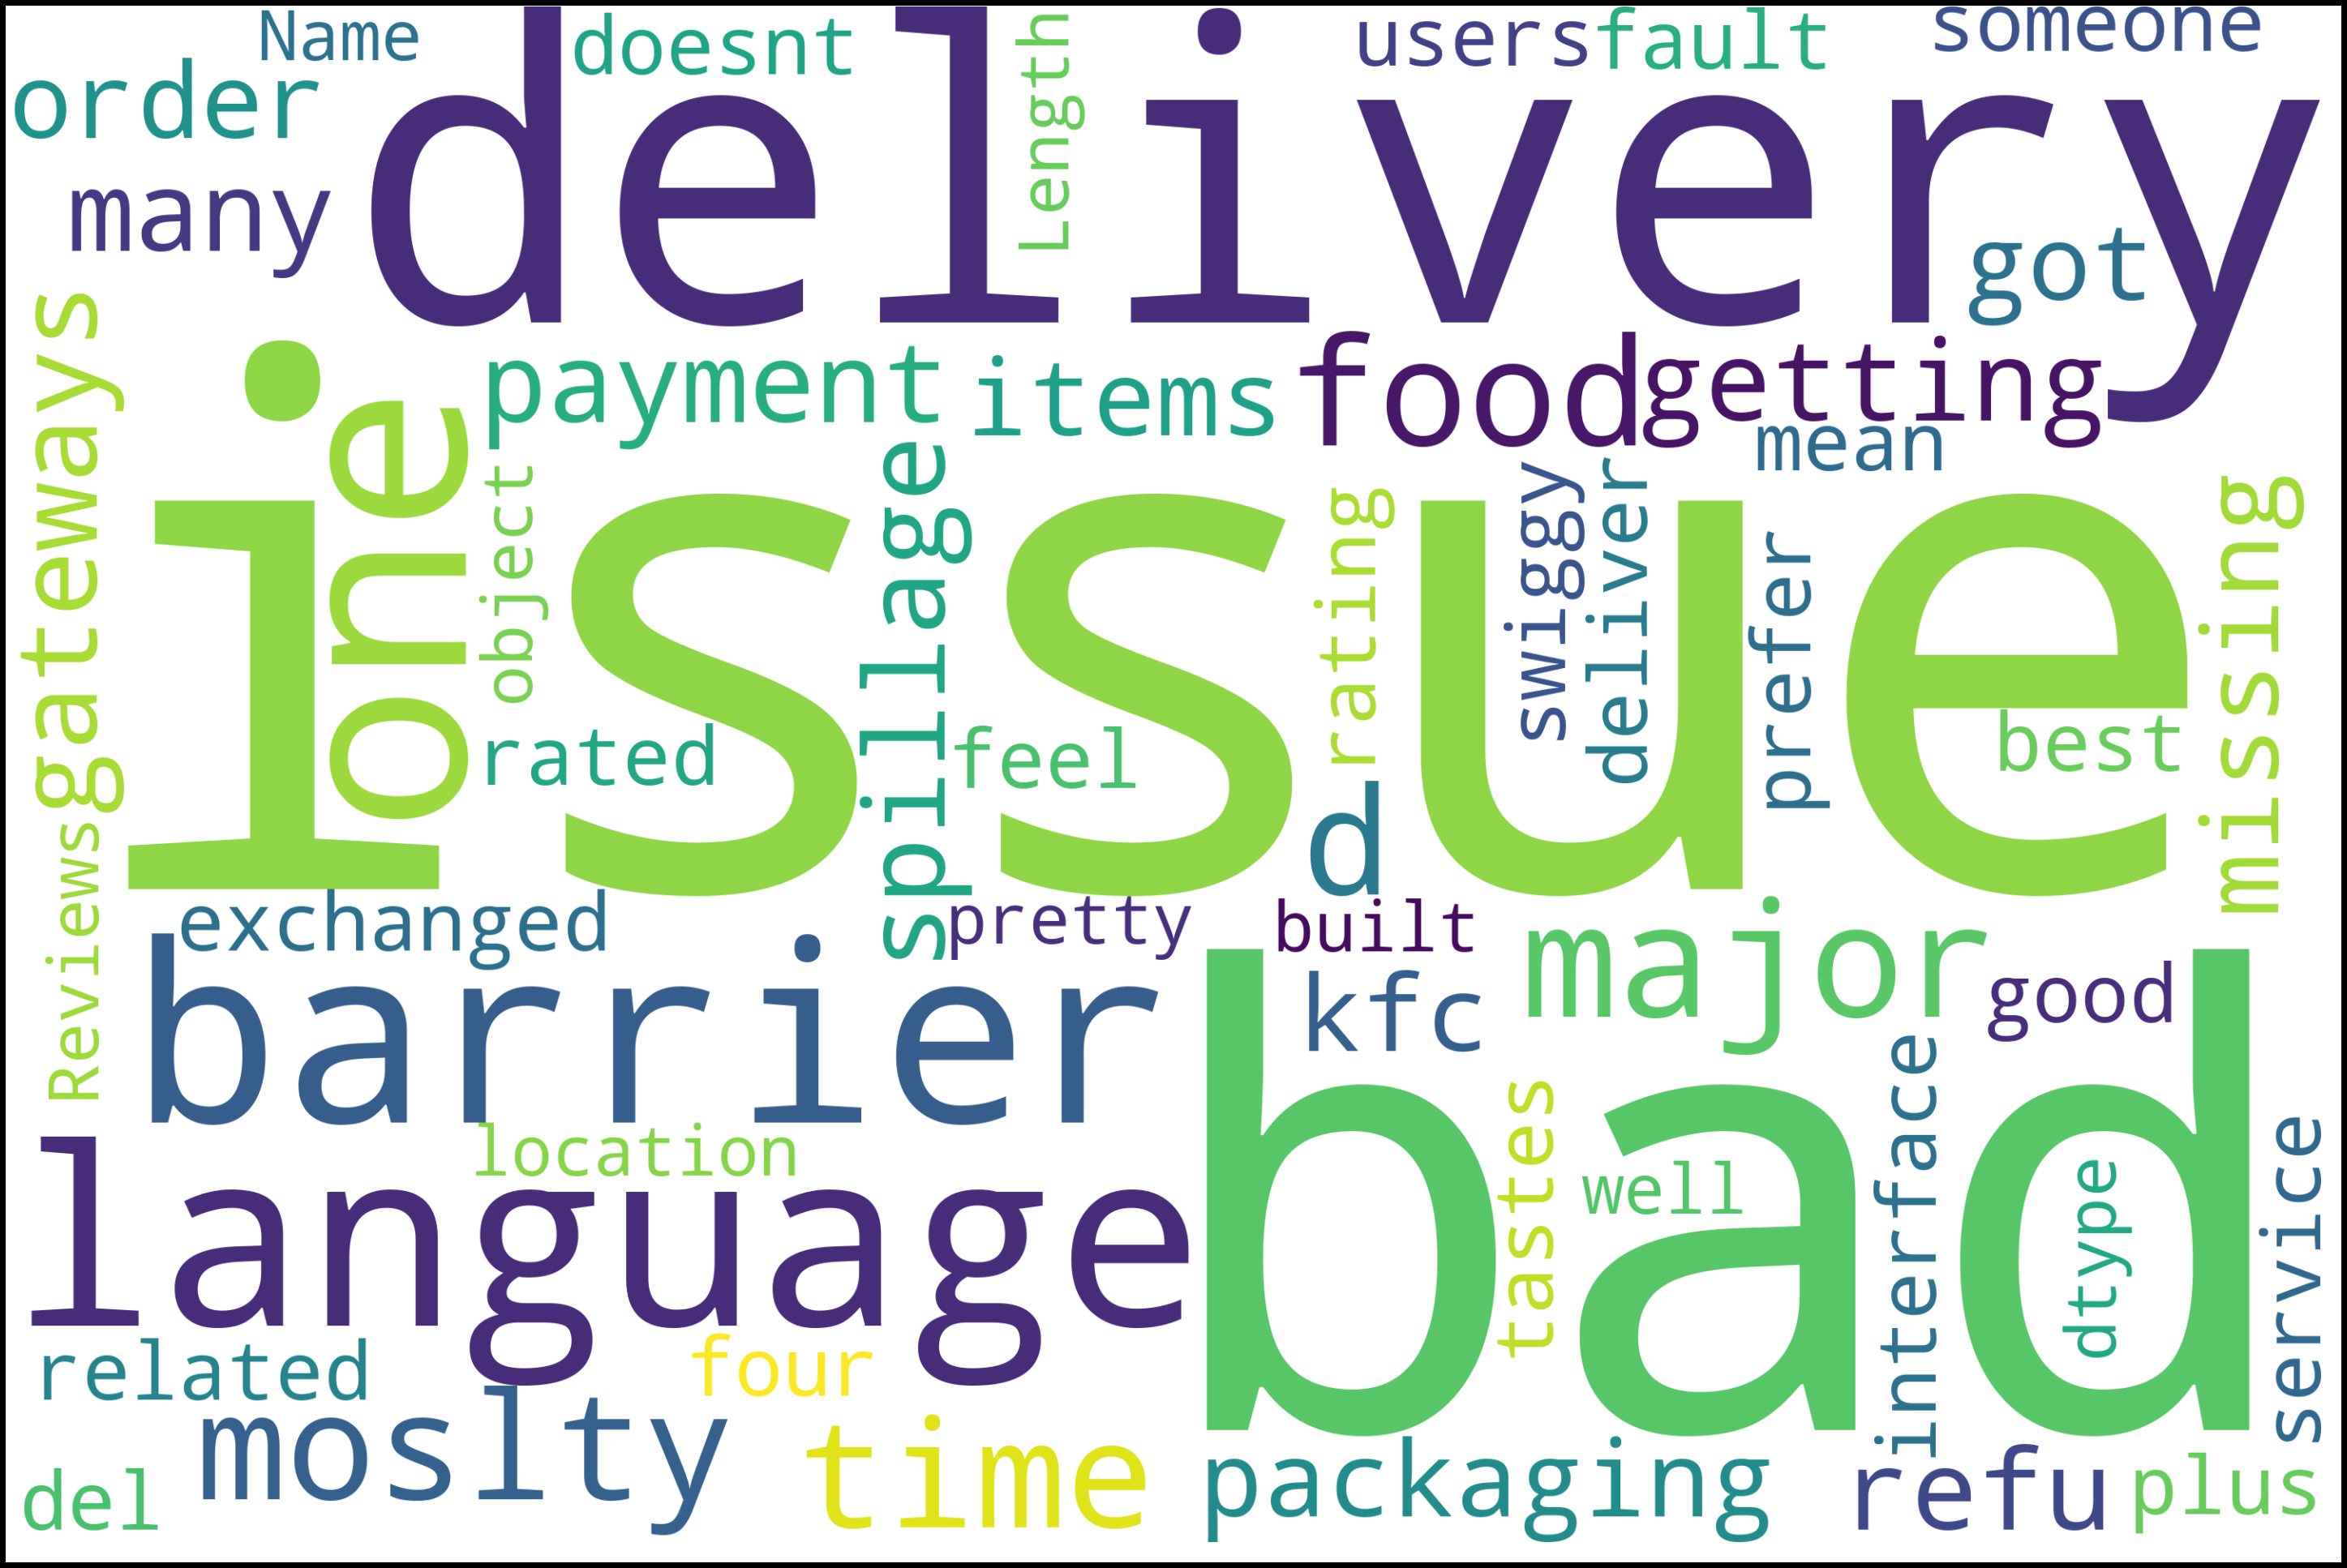

In [74]:
#positive reviews
pos_reviews = fd_reviews[fd_reviews['Output']=='Yes']
text = pos_reviews['Reviews']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

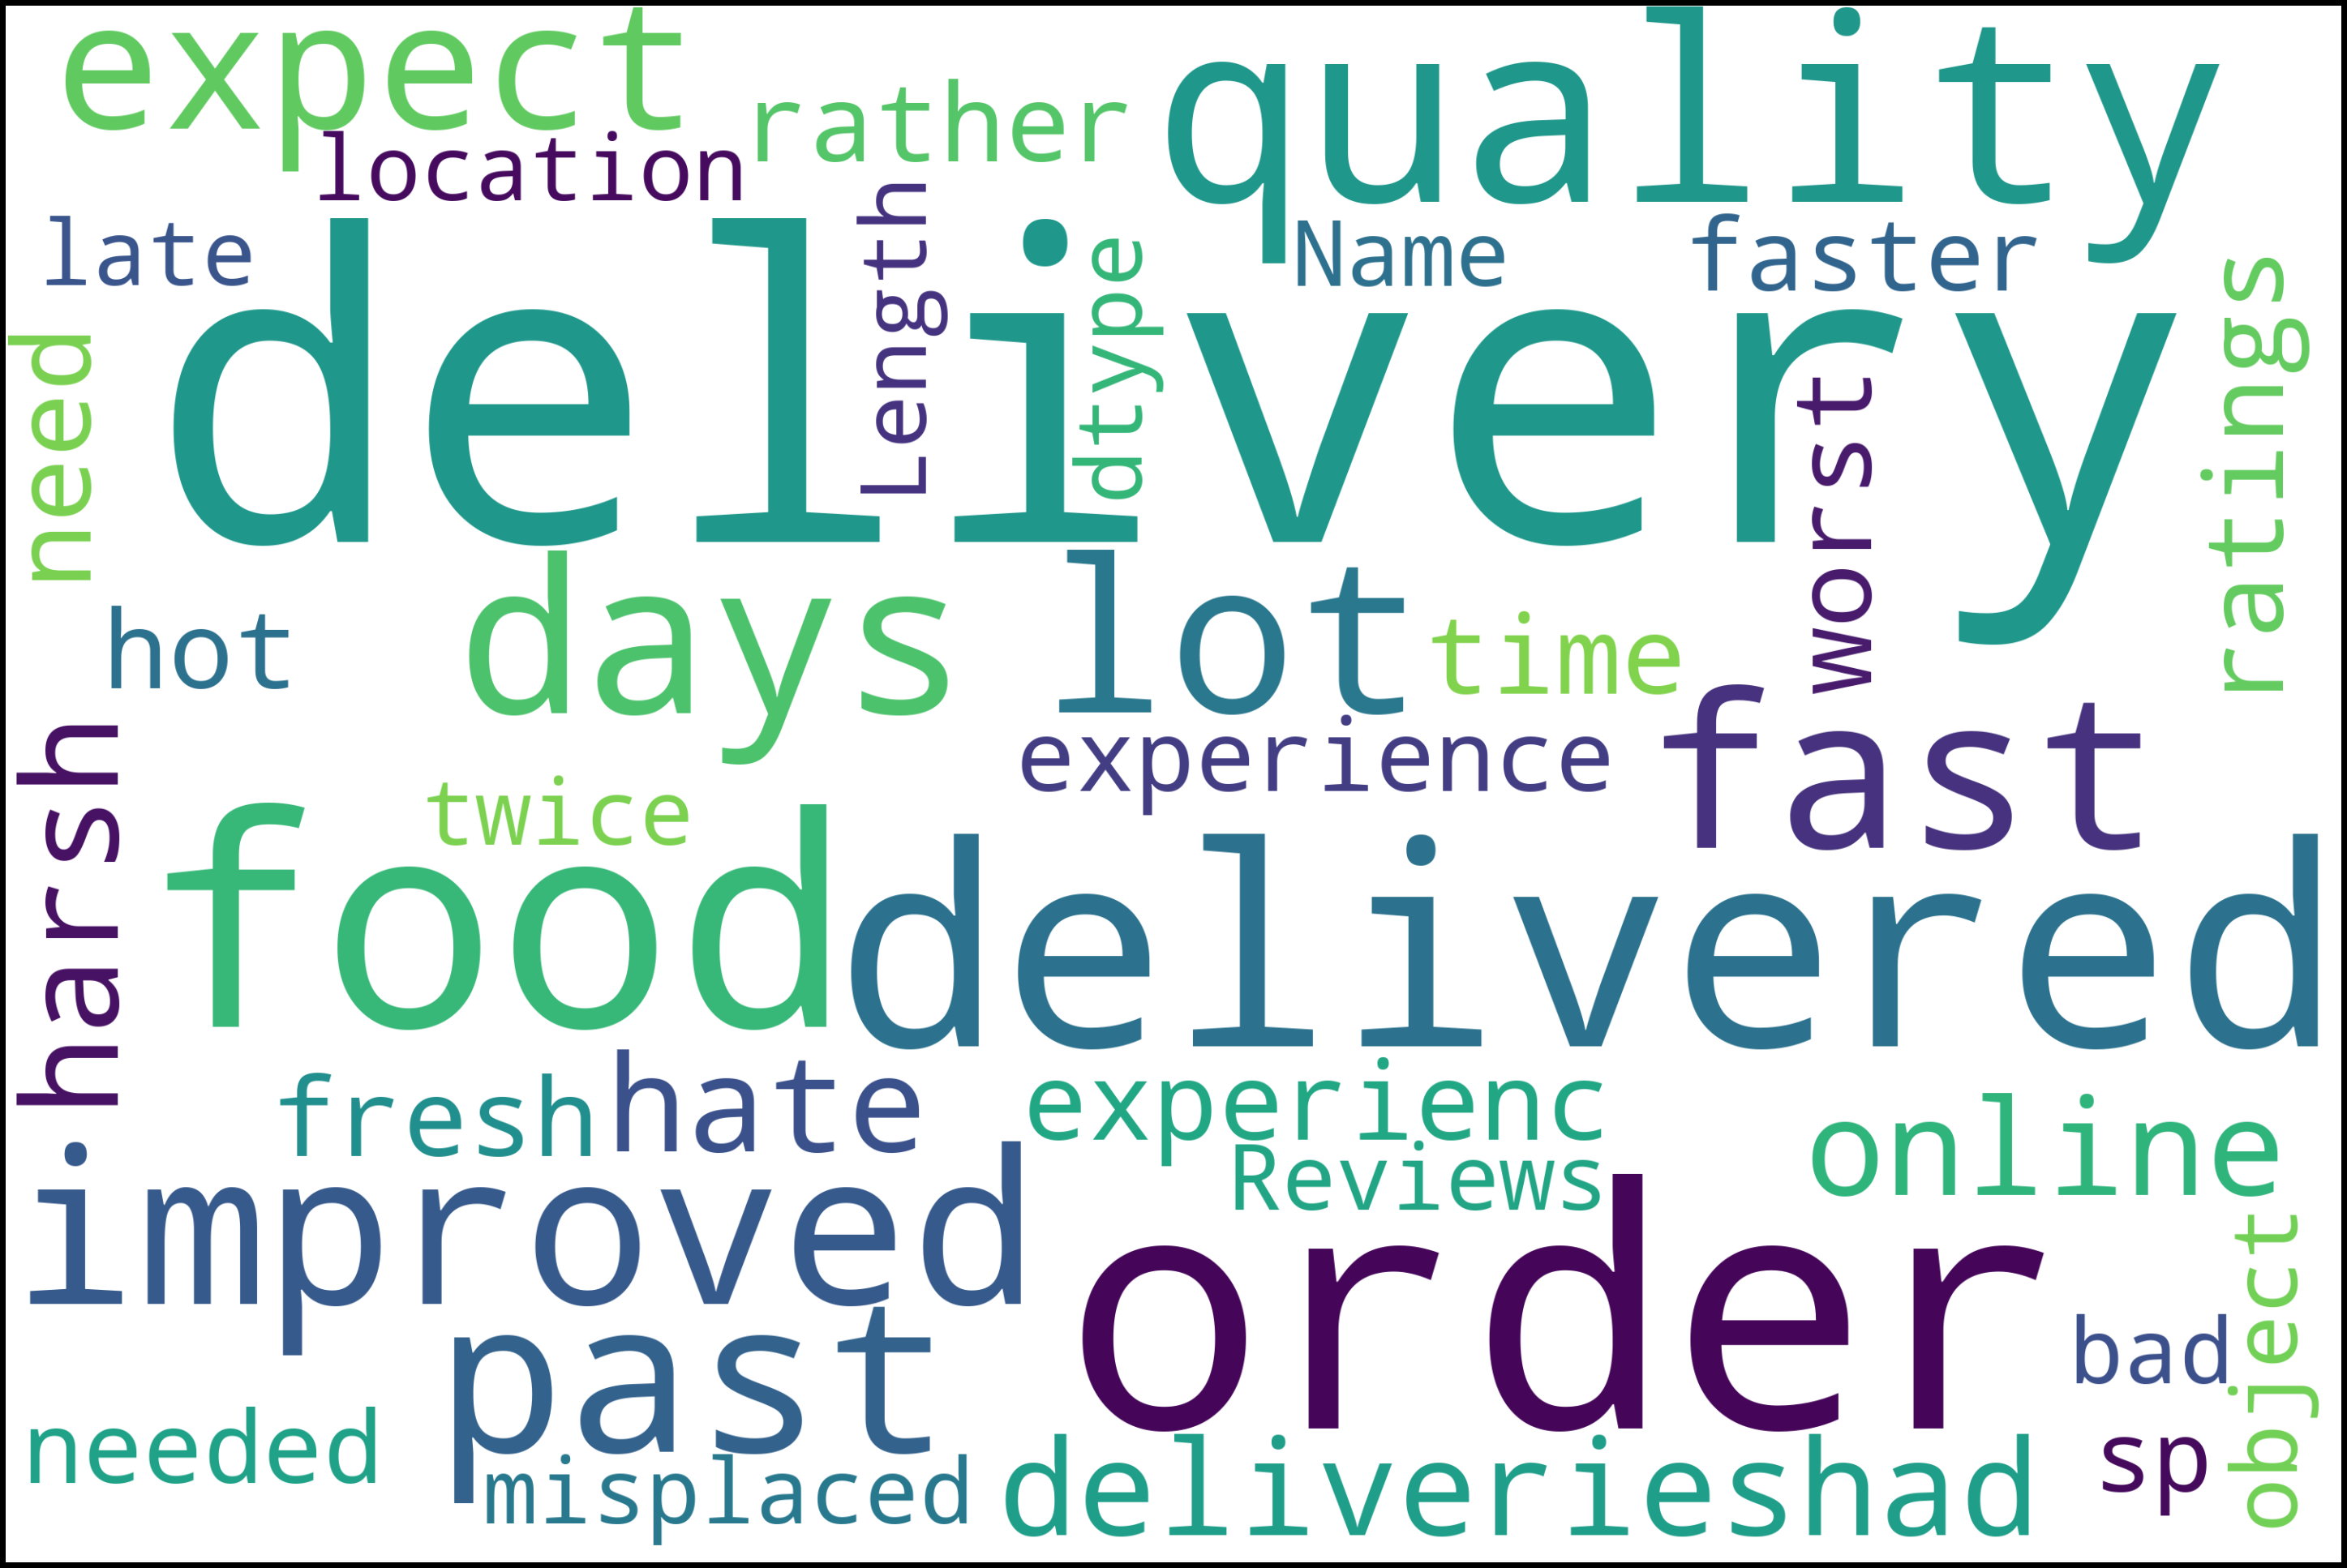

In [77]:
#negative reviews
neg_reviews = fd_reviews[fd_reviews['Output']=='No']
neg_text = neg_reviews['Reviews']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(neg_text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()